### Tobin's Q
- Gross profit
$$ \pi(K(t))k(t),\, \pi'(.)<0$$
- Adjustment cost
$$C(0)=0,\quad C'(0)=0,\, C''(.)>0$$
- Continuous time case:$$max. \Pi = \int_{t=0}^{\infty}[\pi(K(t))k(t)-I(t)-C(I(t))]e^{-rt}dt ,\, r=const,\, k\dot(t)=I(t)$$

- Discrete time case:$$ max. \Pi = \sum_{t=0}^{\infty} \frac{1}{(1+r)^t}[\pi(K(t))k(t)-I(t)-C(I(t))],\, I_t=k_{t+1}-k_t$$

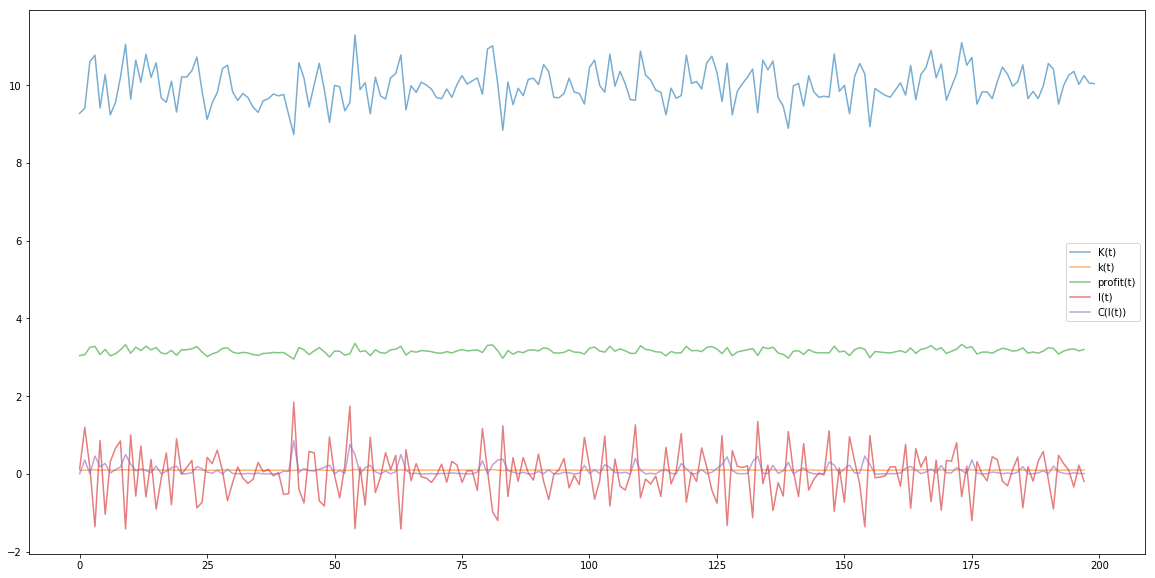

present value at period 155: 2.983090957011335
present value is converge to : 2.9831 after period 155


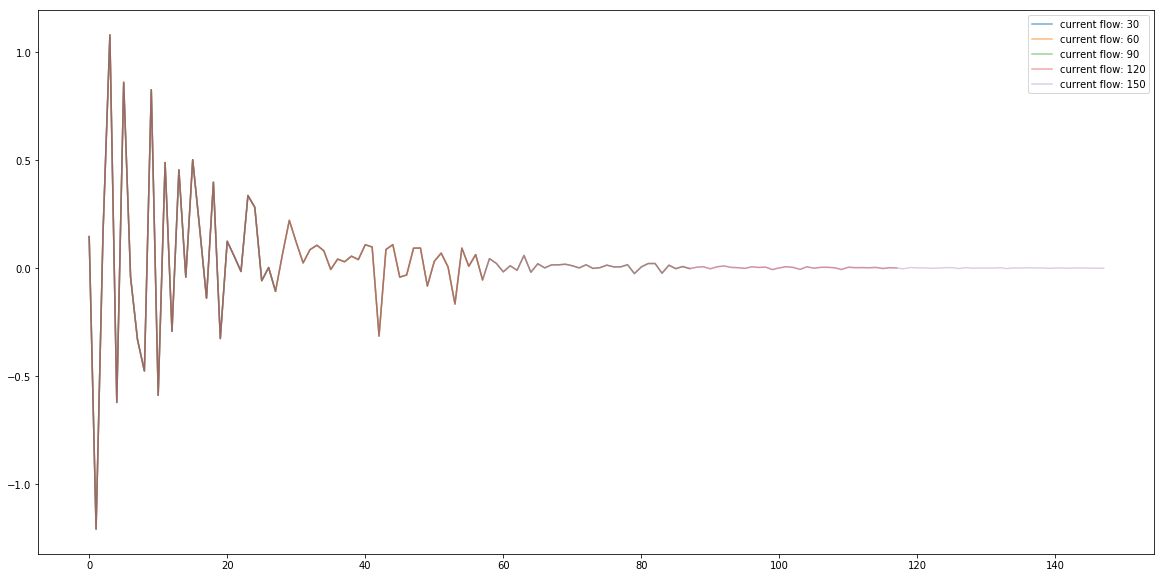

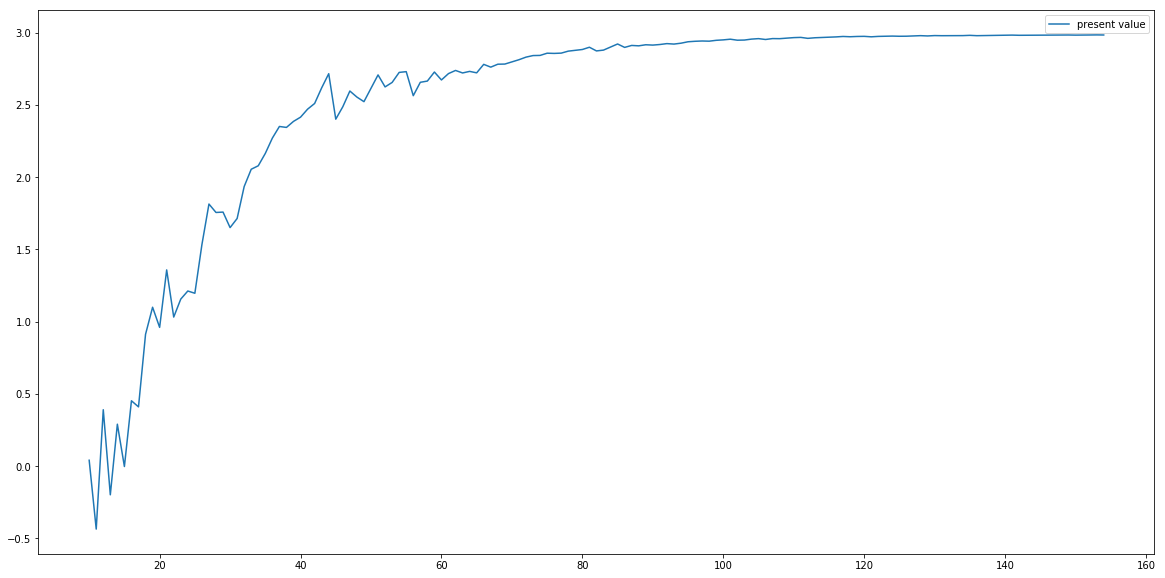

In [141]:
import numpy as np
from matplotlib import pyplot as plt

#First consider discete time case
# the following plots are just one of possible time path of state variables rather than optimal solutions
def profit(K,alpha=0.5):
    #K is array=type 
    return (K**alpha)[:-2]#length = T-1 
def I(K):
    #K is array=type
    return K[1:-1]-K[0:-2]#length = T-1  
def C(I,coef=1/4):
    # I is array-type with length = T-1 (from 0 to T-2)
    return coef*I**2 
def k(K):
    return (K/N)[:-2]#length = T-1 = 99


def PV(K,T,r=0.05,N=100):   
    discount = np.zeros(T-2)
    for t in range(T-2):
        discount[t]=(1+r)**(-t)
#     print(len(profit(K)),len(k(K)),len(I(K)),len(C(I(K))))
    net_profit = np.multiply(discount,profit(K)*k(K)-I(K)-C(I(K)))
    return net_profit #np.sum(net_profit)


period = np.arange(10,201,1)
Y=np.zeros(len(period))
np.random.seed()
Ktot = np.random.normal(mu, sigma, period[-1])
plt.figure(figsize=(20,10))
plt.plot(Ktot,alpha = 0.6,label = 'K(t)')
plt.plot(k(Ktot),alpha = 0.6,label = 'k(t)')
plt.plot(profit(Ktot),alpha = 0.6,label = 'profit(t)')
plt.plot(I(Ktot),alpha = 0.6,label='I(t)')
plt.plot(C(I(Ktot)),alpha = 0.6,label='C(I(t))')
plt.legend()
plt.show()

mu,sigma=10,0.5
plt.figure(figsize=(20,10))
for i,p in enumerate(period):
    #K is seen as exdogenous
    K = Ktot[:p]
    if p%30==0:
        #print(K)
        plt.plot(PV(K=K,T=p),alpha=0.7-p/400.0,label='current flow: '+str(p))
    Y[i]= np.sum(PV(K=K,T=p))
    
    if p>150 and p%5==0:
        print('present value at period '+str(p)+': '+str(Y[i]))
        if Y[i]-Y[i-1]<0.000005:
            print('present value is converge to : '+str(round(Y[i],4))+' after period '+str(p))
            plt.legend()
            plt.show()
            break
plt.figure(figsize=(20,10))            
plt.plot(period[:i],Y[:i],label='present value')
plt.legend()
plt.show()


